In [346]:
#Libraries for data processing
import numpy as np 
import pandas as pd

#Libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(color_codes = True)
sns.set(font_scale=1.5) #fixing font size

#Libraries for artificial neural network
import tensorflow as tf
#import tensorflow_probability as tfp
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Normalization
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import Callback

In [347]:
#from logging import RootLogger
# Mount Google Drive
#from google.colab import drive #import drive from google colab

#root = "/content/drive"     #default location for the drive

#drive.mount(root)           #we mount the google drive at /content/drive

#import join used to join ROOT path and MY_GOOGLE_DRIVE_PATH
#from os.path import join  

#path to your project on Google Drive
#my_google_drive_path = "MyDrive/StudentProject2023"

#project_path = join(root, my_google_drive_path)

In [348]:
#train_data = pd.read_csv(join(project_path,"rescaled_data/train_rescaled_data.csv"), sep=";")
train_data = pd.read_csv("/Users/martinbordeau/Downloads/StudentProject2023/rescaled_data/train_rescaled_data.csv", sep=";")

In [349]:
#First inputs
target = train_data["rescaled_ame_BE"]
n_input = train_data["rescaled_N"]
z_input = train_data["rescaled_Z"]

#Liquid drop inputs
surf_input = train_data["rescaled_Surf"]
asym_input = train_data["rescaled_Asym"]
coul_input = train_data["rescaled_Coul"]
pair_input = train_data["rescaled_Pair"]

#Other inputs that may help
z_parity_input = train_data["rescaled_Z_parity"]
n_parity_input = train_data["rescaled_N_parity"]
z_distance_input = train_data["rescaled_Z_distance"]  
n_distance_input = train_data["rescaled_N_distance"]
S1p_input = train_data["rescaled_ame_S1p"]
S1n_input = train_data["rescaled_ame_S1n"]
S2p_input = train_data["rescaled_ame_S2p"]
S2n_input = train_data["rescaled_ame_S2n"]

In [350]:
def create_model(num_inputs, num_layers, num_neurons):
    inputs = [keras.layers.Input(shape=(1,)) for i in range(num_inputs)]
    merged = keras.layers.Concatenate()(inputs)

    dense = merged
    for i in range(num_layers):
        dense = Dense(num_neurons, activation="relu")(dense)
    
    output = Dense(1, activation="relu")(dense)
    model = keras.models.Model(inputs, output)
    return model

In [351]:
model4 = create_model(12,14,100)

In [352]:


#checkpointer = keras.callbacks.ModelCheckpoint(filepath='best_model.csv', 
#                                            monitor='mean_squared_error', 
#                                                verbose=1, 
#                                                save_best_only=True)


#model4.compile(optimizer=Adam(learning_rate=0.00001), loss="mean_squared_error")
#model4.fit([input1, input2, input3, input4, input5, input6, input7, input8], output, epochs=100, callbacks=[checkpointer])


In [353]:
model4.compile(optimizer=Adam(learning_rate=0.001), loss="mean_squared_error")

##

In [354]:
class EarlyStoppingByLossValue(Callback):
    def __init__(self, value=0.00000009):
        self.value = value

    def on_epoch_end(self, epoch, logs={}):
        current_loss = logs.get("loss")
        if current_loss < self.value:
            self.model.stop_training = True
            print("Early stopping by loss value at epoch", epoch)

early_stopping = EarlyStoppingByLossValue()



In [355]:
#history4=model4.fit(x=([n_input, z_input, surf_input, coul_input, asym_input, pair_input, z_parity_input, n_parity_input]), y=target, epochs=1000, shuffle=True, verbose=2, )
history4=model4.fit(x=([n_input, z_input, surf_input, coul_input, asym_input, pair_input, S1n_input, S1p_input, S2n_input, S2p_input, z_distance_input, n_distance_input]), y=target, epochs=20000, shuffle=True, verbose=2, callbacks=[early_stopping] )
#history4=model4.fit(x=([n_input, z_input, surf_input, coul_input, asym_input, pair_input, z_parity_input, n_parity_input, S1n_input, S1p_input]), y=target, epochs=1000, shuffle=True, verbose=2, )
#history4=model4.fit(x=([n_input, z_input, surf_input, coul_input, asym_input, pair_input, z_parity_input, n_parity_input, S1n_input, S1p_input, S2n_input, S2p_input]), y=target, epochs=1000, shuffle=True, verbose=2, )

plt.figure(figsize =(20,13))
plt.yscale('log')
plt.legend('labels')

plt.plot(history4.history["loss"])
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.show()
#Be careful : loss is mean_squared_error, not RMS, and is calculated among 
#Rescaled variable, so it doesn't mean a lot

Epoch 1/20000
84/84 - 1s - loss: 0.0268 - 669ms/epoch - 8ms/step
Epoch 2/20000
84/84 - 0s - loss: 1.0902e-04 - 126ms/epoch - 1ms/step
Epoch 3/20000
84/84 - 0s - loss: 8.7384e-05 - 131ms/epoch - 2ms/step
Epoch 4/20000
84/84 - 0s - loss: 7.2507e-05 - 131ms/epoch - 2ms/step
Epoch 5/20000
84/84 - 0s - loss: 4.7350e-05 - 123ms/epoch - 1ms/step
Epoch 6/20000
84/84 - 0s - loss: 3.0467e-05 - 124ms/epoch - 1ms/step
Epoch 7/20000
84/84 - 0s - loss: 2.6265e-05 - 119ms/epoch - 1ms/step
Epoch 8/20000
84/84 - 0s - loss: 2.9338e-05 - 130ms/epoch - 2ms/step
Epoch 9/20000
84/84 - 0s - loss: 2.2622e-05 - 126ms/epoch - 2ms/step
Epoch 10/20000
84/84 - 0s - loss: 2.0019e-05 - 125ms/epoch - 1ms/step
Epoch 11/20000
84/84 - 0s - loss: 3.8608e-05 - 122ms/epoch - 1ms/step
Epoch 12/20000
84/84 - 0s - loss: 2.6563e-05 - 122ms/epoch - 1ms/step
Epoch 13/20000
84/84 - 0s - loss: 1.3687e-05 - 121ms/epoch - 1ms/step
Epoch 14/20000
84/84 - 0s - loss: 1.4256e-05 - 176ms/epoch - 2ms/step
Epoch 15/20000
84/84 - 0s - loss:

KeyboardInterrupt: 

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))

#rescaled_data = pd.read_csv(join(project_path,"rescaled_data/rescaled_data.csv"), sep=";")
rescaled_data = pd.read_csv("/Users/martinbordeau/Downloads/StudentProject2023/rescaled_data/rescaled_data.csv", sep=";")

rescaled_target = scaler.fit_transform(pd.Series.to_numpy(rescaled_data["ame_BE"]).reshape(-1,1))

<AxesSubplot:xlabel='A', ylabel='Difference_BE_AME_ANN'>

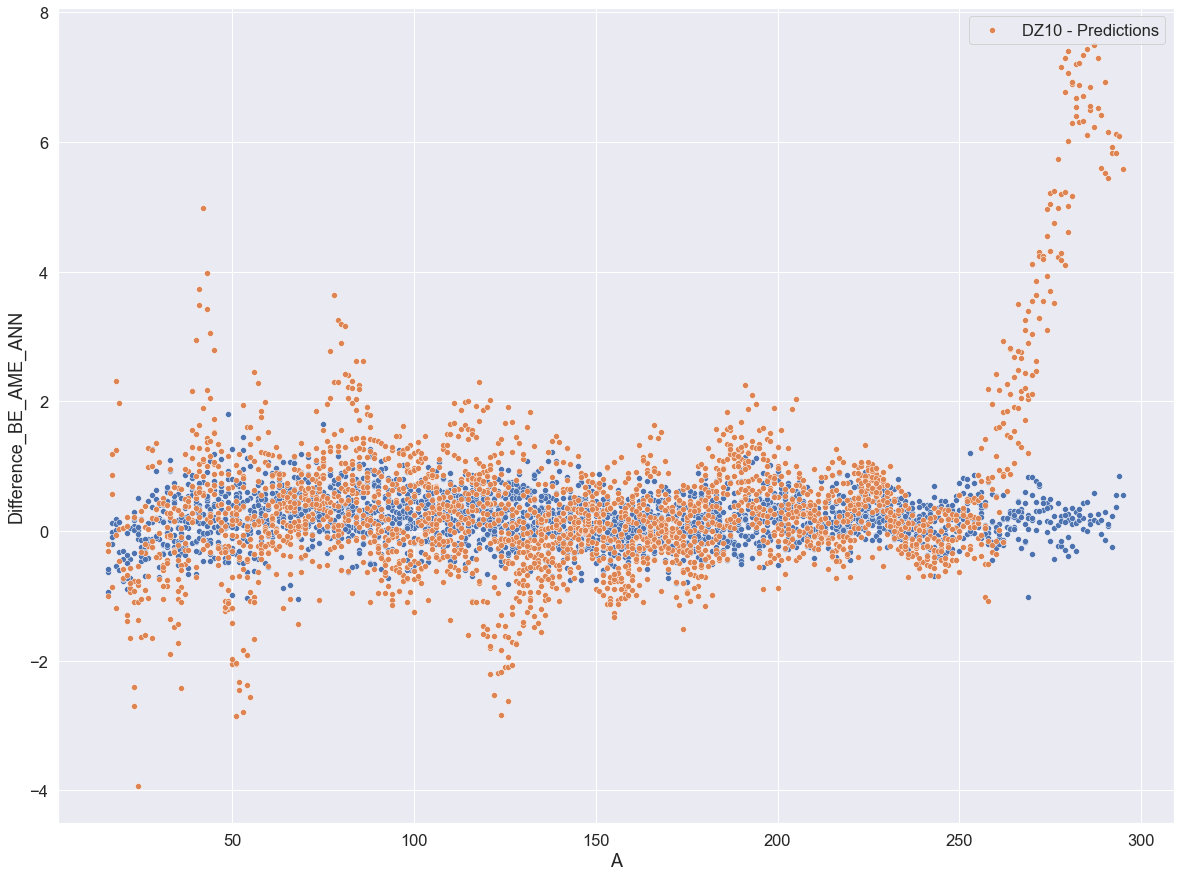

In [ ]:
#train_predictions = model4.predict(x=([n_input, z_input, surf_input, coul_input, asym_input, pair_input, n_parity_input, z_parity_input]), verbose=0)
train_predictions = model4.predict(x=([n_input, z_input, surf_input, coul_input, asym_input, pair_input, S1n_input, S1p_input,  S2n_input, S2p_input, z_distance_input, n_distance_input]), verbose=0)
#train_predictions = model4.predict(x=([n_input, z_input, surf_input, coul_input, asym_input, pair_input, n_parity_input, z_parity_input, S1n_input, S1p_input]), verbose=0)
#train_predictions = model4.predict(x=([n_input, z_input, surf_input, coul_input, asym_input, pair_input, n_parity_input, z_parity_input, S1n_input, S1p_input, S2n_input, S2p_input]), verbose=0)

train_rescaled_predictions = [(i - scaler.min_)/scaler.scale_ for i in train_predictions]


train_data["BE_Predictions"] = np.double(train_rescaled_predictions)
train_data["Difference_BE_AME_ANN"] = train_data["ame_BE"] - train_data["BE_Predictions"]
train_data["Difference_BE_DZ_AME"] = train_data["dz_BE"] - train_data["ame_BE"]
train_data["Difference_BE_DZ_ANN"] = train_data["dz_BE"] - train_data["BE_Predictions"]

plt.figure(figsize =(20,15))
#plt.title("Difference between BE_AME(exp) and BE_AME(predicted) for train data")

sns.scatterplot(x="A",y="Difference_BE_AME_ANN",data=train_data, palette="rainbow_r")
sns.scatterplot(x="A",y="Difference_BE_DZ_ANN",data=train_data, palette="rainbow_r", label='DZ10 - Predictions')

In [ ]:
rms_train = np.sqrt(((train_data["Difference_BE_AME_ANN"] ** 2).sum()) / len(train_data["Difference_BE_AME_ANN"]))

print('RMS AME - Predict:', rms_train)

RMS AME - Predict: 0.41071999134902754


In [ ]:
validation_data = pd.read_csv("/Users/martinbordeau/Downloads/StudentProject2023/rescaled_data/validation_rescaled_data.csv", sep=";")
#validation_data = pd.read_csv(join(project_path,"rescaled_data/validation_rescaled_data.csv"), sep=";")

test_target = validation_data["rescaled_ame_BE"]
test_n_input = validation_data["rescaled_N"]
test_z_input = validation_data["rescaled_Z"]
test_coul_input = validation_data["rescaled_Coul"]
test_surf_input = validation_data["rescaled_Surf"]
test_asym_input = validation_data["rescaled_Asym"]
test_pair_input = validation_data["rescaled_Pair"]
test_z_parity_input = validation_data["rescaled_Z_parity"]
test_n_parity_input = validation_data["rescaled_N_parity"]
test_z_distance_input = validation_data["rescaled_Z_distance"]
test_n_distance_input = validation_data["rescaled_N_distance"]
test_S1p_input = validation_data["rescaled_ame_S1p"]
test_S1n_input = validation_data["rescaled_ame_S1n"]
test_S2p_input = validation_data["rescaled_ame_S2p"]
test_S2n_input = validation_data["rescaled_ame_S2n"]

5/5 [==============================] - 0s 1ms/step


<AxesSubplot:title={'center':'Difference between BE_AME(exp) and BE_AME(predicted) for validation'}, xlabel='A', ylabel='Difference_BE_AME_ANN'>

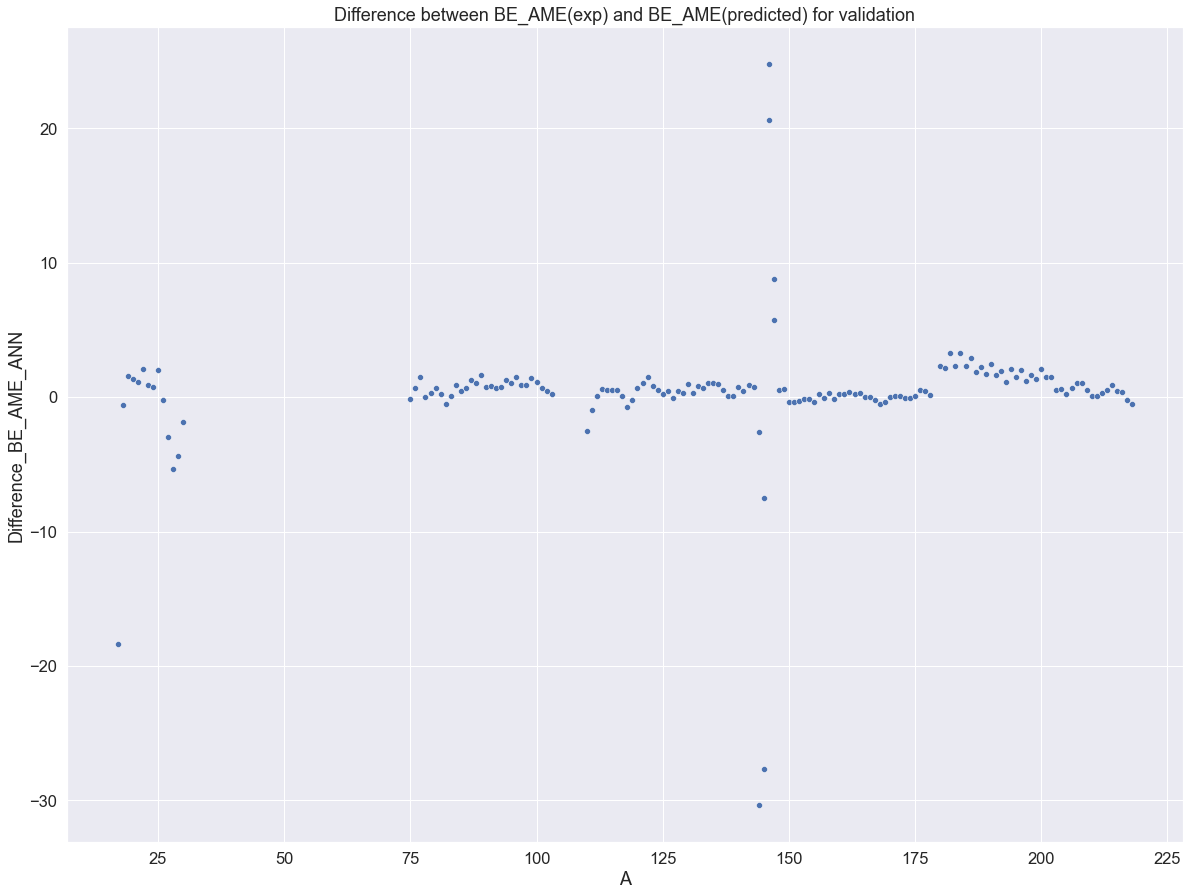

In [ ]:
validation_predictions = model4.predict(x=([test_n_input, test_z_input, test_surf_input, test_coul_input, test_asym_input, test_pair_input,  test_S1n_input, test_S1p_input, test_S2n_input, test_S2p_input, test_z_distance_input, test_n_distance_input]))

validation_rescaled_predictions = [ (i - scaler.min_)/scaler.scale_ for i in validation_predictions]

validation_data["BE_Predictions"] = np.double(validation_rescaled_predictions)
validation_data["Difference_BE_AME_ANN"] = validation_data["ame_BE"] - validation_data["BE_Predictions"]
validation_data["Difference_BE_DZ_ANN"] = validation_data["dz_BE"] - validation_data["BE_Predictions"]


plt.figure(figsize =(20,15))
plt.title("Difference between BE_AME(exp) and BE_AME(predicted) for validation")

sns.scatterplot(x="A",y="Difference_BE_AME_ANN",data=validation_data, palette="rainbow_r")

In [ ]:
rms_validation = np.sqrt(((validation_data["Difference_BE_AME_ANN"] ** 2).sum()) / len(validation_data["Difference_BE_AME_ANN"]))

print('RMS AME - Predict:', rms_validation)

RMS AME - Predict: 4.7315119832894785


#### S2n et S2p (prediction)

In [ ]:
train_data=train_data.sort_values(by=['A','N'], ascending=True)
train_data.head(15)

,Unnamed: 0,Z,N,dz_BE/A,dz_ME,A,dz_BE,dz_S1n,dz_S1p,dz_S2p,...,rescaled_Z_parity,rescaled_ame_BE,rescaled_ame_S1n,rescaled_ame_S1p,rescaled_ame_S2n,rescaled_ame_S2p,BE_Predictions,Difference_BE_AME_ANN,Difference_BE_DZ_AME,Difference_BE_DZ_ANN
11,47,8.0,8.0,7.993990,-5.020561,16.0,127.903839,16.131404,12.683879,23.435447,...,1.0,0.064186,0.966225,0.923327,0.962061,0.882097,128.209107,-0.589792,0.284524,-0.305268
3,36,7.0,9.0,7.419595,4.952110,16.0,118.713516,3.493556,12.850725,33.437960,...,0.0,0.059584,0.929293,0.920830,0.919734,0.917646,118.916737,-0.935984,0.732763,-0.203221
0,29,6.0,10.0,6.898167,14.077316,16.0,110.370667,4.507875,23.188839,42.117482,...,1.0,0.056133,0.934231,0.963426,0.898377,0.946441,111.379458,-0.626584,-0.382207,-1.008791
20,56,9.0,8.0,7.587443,1.185776,17.0,128.986529,17.576861,1.082690,13.766569,...,0.0,0.064473,0.969395,0.878988,0.967147,0.848690,128.413212,-0.193629,0.766946,0.573317
12,48,8.0,9.0,7.812744,-1.862000,17.0,132.816650,4.912811,14.103134,26.953859,...,1.0,0.066165,0.933930,0.929690,0.937368,0.892269,131.630974,0.131421,1.054256,1.185676
4,37,7.0,10.0,7.341997,6.923058,17.0,124.813943,6.100427,14.443277,37.632115,...,0.0,0.062394,0.938814,0.927118,0.906278,0.928452,123.956278,-0.090378,0.948044,0.857666
1,30,6.0,11.0,6.508854,21.868843,17.0,110.650516,0.279850,23.692936,44.979583,...,1.0,0.056483,0.924373,0.966567,0.897059,0.955251,111.508340,-0.021895,-0.835929,-0.857824
21,57,9.0,9.0,7.753909,-1.326675,18.0,139.570355,10.583827,6.753705,20.856839,...,0.0,0.068842,0.947965,0.898246,0.954059,0.871853,137.258192,0.111297,2.200866,2.312163
13,49,8.0,10.0,7.835628,-2.015274,18.0,141.041305,8.224654,16.227361,30.670638,...,1.0,0.070006,0.944869,0.937999,0.916651,0.905466,139.793269,0.014497,1.233539,1.248035
5,38,7.0,11.0,7.064774,12.642456,18.0,127.165924,2.351981,16.515408,40.208343,...,0.0,0.063745,0.930245,0.935175,0.907201,0.938576,127.230867,-0.536738,0.471795,-0.064943


In [ ]:
train_data=train_data.sort_values(by=['N','Z'], ascending=True)
train_data['Prediction_S2p'] = train_data['BE_Predictions'] - train_data['BE_Predictions'].shift(2)

train_data = train_data.sort_values(by=['A','N'], ascending=True)
train_data['Prediction_S2n'] = train_data['BE_Predictions'] - train_data['BE_Predictions'].shift(2)
train_data['Prediction_S1n'] = train_data['BE_Predictions'] - train_data['BE_Predictions'].shift(1)

train_data["Difference_S2n_AME_Predictions"] = train_data["ame_S2n"] - train_data["Prediction_S2n"]
train_data["Difference_S2p_AME_Predictions"] = train_data["ame_S2p"] - train_data["Prediction_S2p"]

train_data["Difference_S2n_DZ_Predictions"] = train_data["dz_S2n"] - train_data["Prediction_S2n"]
train_data["Difference_S2p_DZ_Predictions"] = train_data["dz_S2p"] - train_data["Prediction_S2p"]

In [ ]:
train_data.head(25)

,Unnamed: 0,Z,N,dz_BE/A,dz_ME,A,dz_BE,dz_S1n,dz_S1p,dz_S2p,...,Difference_BE_AME_ANN,Difference_BE_DZ_AME,Difference_BE_DZ_ANN,Prediction_S2p,Prediction_S2n,Prediction_S1n,Difference_S2n_AME_Predictions,Difference_S2p_AME_Predictions,Difference_S2n_DZ_Predictions,Difference_S2p_DZ_Predictions
11,47,8.0,8.0,7.993990,-5.020561,16.0,127.903839,16.131404,12.683879,23.435447,...,-0.589792,0.284524,-0.305268,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,36,7.0,9.0,7.419595,4.952110,16.0,118.713516,3.493556,12.850725,33.437960,...,-0.935984,0.732763,-0.203221,-9.292370,NaN,-9.292370,NaN,41.850092,NaN,42.730329
0,29,6.0,10.0,6.898167,14.077316,16.0,110.370667,4.507875,23.188839,42.117482,...,-0.626584,-0.382207,-1.008791,-35.336825,-16.829649,-7.537279,22.298045,76.175136,22.731923,77.454307
20,56,9.0,8.0,7.587443,1.185776,17.0,128.986529,17.576861,1.082690,13.766569,...,-0.193629,0.766946,0.573317,NaN,9.496475,17.033754,21.261213,NaN,24.065161,NaN
12,48,8.0,9.0,7.812744,-1.862000,17.0,132.816650,4.912811,14.103134,26.953859,...,0.131421,1.054256,1.185676,3.217762,20.251516,3.217762,-0.444494,22.042089,0.792700,23.736097
4,37,7.0,10.0,7.341997,6.923058,17.0,124.813943,6.100427,14.443277,37.632115,...,-0.090378,0.948044,0.857666,-25.970980,-4.456934,-7.674696,12.830929,61.636223,14.050917,63.603095
1,30,6.0,11.0,6.508854,21.868843,17.0,110.650516,0.279850,23.692936,44.979583,...,-0.021895,-0.835929,-0.857824,-57.544603,-20.122634,-12.447938,25.106535,100.916487,24.910359,102.524186
21,57,9.0,9.0,7.753909,-1.326675,18.0,139.570355,10.583827,6.753705,20.856839,...,0.111297,2.200866,2.312163,18.341455,13.301914,25.749852,12.642791,1.047281,14.858773,2.515384
13,49,8.0,10.0,7.835628,-2.015274,18.0,141.041305,8.224654,16.227361,30.670638,...,0.014497,1.233539,1.248035,28.413811,28.284929,2.535077,-16.096478,0.641081,-15.147464,2.256827
5,38,7.0,11.0,7.064774,12.642456,18.0,127.165924,2.351981,16.515408,40.208343,...,-0.536738,0.471795,-0.064943,-45.329324,-10.027325,-12.562402,18.740700,83.905797,18.479733,85.537668


In [ ]:
validation_data.sort_values(by=['N','Z'], ascending=True)
validation_data['Prediction_S2p'] = validation_data['BE_Predictions'] - validation_data['BE_Predictions'].shift(2)

validation_data = validation_data.sort_values(by=['A','N'], ascending=True)
validation_data['Prediction_S2n'] = validation_data['BE_Predictions'] - validation_data['BE_Predictions'].shift(2)
validation_data['Prediction_S1n'] = validation_data['BE_Predictions'] - validation_data['BE_Predictions'].shift(1)

validation_data["Difference_S2n_AME_Predictions"] = validation_data["ame_S2n"] - validation_data["Prediction_S2n"]
validation_data["Difference_S2p_AME_Predictions"] = validation_data["ame_S2p"] - validation_data["Prediction_S2p"]

validation_data["Difference_S2n_DZ_Predictions"] = validation_data["dz_S2n"] - validation_data["Prediction_S2n"]
validation_data["Difference_S2p_DZ_Predictions"] = validation_data["dz_S2p"] - validation_data["Prediction_S2p"]

### We save the predictions into .csv and we will plot them on another notebook

In [ ]:
#train_final_csv = train_data.to_csv(join(project_path,"final_data/train_final_data.csv"),sep=";")
#validation_final_csv = validation_data.to_csv(join(project_path,"final_data/validation_final_data.csv"),sep=";")

train_data.to_csv("/Users/martinbordeau/Downloads/StudentProject2023/final_data/train_final_data.csv",sep=";")
validation_data.to_csv("/Users/martinbordeau/Downloads/StudentProject2023/final_data/validation_final_data.csv",sep=";")